# Synthetic Financial For Fraud Detection

## Intro
PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.


## Problem
- Financial institutions struggle to fight and identify fraud in financial transaction. It is important for financial institution to be able to recognize fraudulent transactions


## Goals
- To make an exploratory data analysis
- predict fraudulent transactions

## Dataset
Size of Dataset :
- 6,362,620 rows, 
- 11 columns

### Data Description

- **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
- **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
- **amount** - amount of the transaction in local currency.
- **nameOrig** - customer who started the transaction
- **oldbalanceOrg** - initial balance before the transaction
- **newbalanceOrig** - new balance after the transaction
- **nameDest** - customer who is the recipient of the transaction
- **oldbalanceDest** - initial balance of recipient before the transaction.
- **newbalanceDest** - new balance of recipient after the transaction.
- **isFraud** - identifies :
    - 1 : a fraudulent transaction, 
    - 0 : non fraudulent
> This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
- **isFlaggedFraud**  - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Y = isFraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
pd.concat([df.head(), df.tail()])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.00,C873221189,6510099.11,7360101.63,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.shape

(6362620, 11)

In [7]:
# Checking if there is any null values
df.isnull().sum()

# We have no missing value

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Statistics description of each features
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# Method describe to obtain a summary for object data
df.describe(include = 'O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1065307291,C1286084959
freq,2237500,3,113


In [10]:
FraudDesc = []

for i in df.columns:
    FraudDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = FraudDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

# We have no missing value


,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,step,int64,0,0.0,743,"[145, 465]"
1,type,object,0,0.0,5,"[DEBIT, PAYMENT]"
2,amount,float64,0,0.0,5316900,"[221295.04, 194955.84]"
3,nameOrig,object,0,0.0,6353307,"[C57432663, C946445776]"
4,oldbalanceOrg,float64,0,0.0,1845844,"[219842.08, 117545.0]"
5,newbalanceOrig,float64,0,0.0,2682586,"[155541.31, 1708283.04]"
6,nameDest,object,0,0.0,2722362,"[M1026067692, M1951230282]"
7,oldbalanceDest,float64,0,0.0,3614697,"[2315939.92, 204545.03]"
8,newbalanceDest,float64,0,0.0,3555499,"[3093312.89, 103094.55]"
9,isFraud,int64,0,0.0,2,"[1, 0]"


In [11]:
df['isFraud'].value_counts()

# We have an imbalance data

0    6354407
1       8213
Name: isFraud, dtype: int64

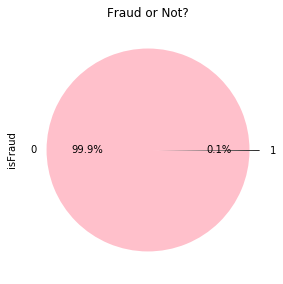

In [12]:
plt.subplot(1,2,2)
count = df['isFraud'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['pink', 'black'], figsize = (10,7),explode = [0,0.1],title = "Fraud or Not?")

# Only 0.1% of the data is identified as Fraud

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


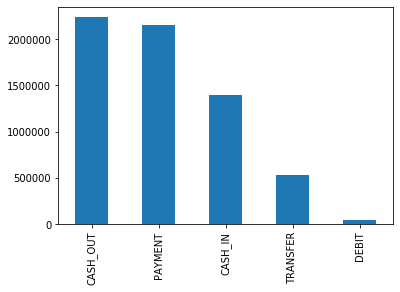

In [13]:
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [15]:
pd.crosstab(index = df['type'], columns = df['isFraud'], normalize = 'columns')

# Only Cash out and Transfer that considered to be fraud

isFraud,0,1
type,,
CASH_IN,0.220207,0.000000
CASH_OUT,0.351470,0.501157
DEBIT,0.006520,0.000000
PAYMENT,0.338583,0.000000
TRANSFER,0.083220,0.498843


Definition for types :
- Cash in :  process of increasing balance of account paying in `cash to a merchant`.
- Cash out : `withdraw cash` from a merchant which decreases balance of the account
- Debit : Same as `Cash out` , sending money from mobile money service to a `bank account`
- Payment : Paying for goods or services to merchants which decreases the account balance and increases the balance of the receiver
- Transfer : `Sending money` to another user of services through the money mobile platform
    

Text(0.5, 1.0, 'Type of Payments')

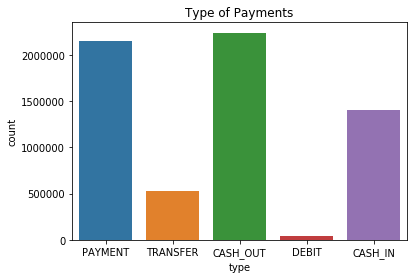

In [16]:
sns.countplot(df.type)
plt.title('Type of Payments')

- There are five types of transactions, fraud occurs only in two of them :
    - 'TRANSFER' where money is sent to a customer/fraudster
    - 'CASH_OUT' where money is sent to a merchant who pays the customer/fraudster in cash
    
- the number of fraudulent TRANSFERs almost equals to CASH_OUTs.
- Fraud is committed by transferring out funds to another account then cash it out

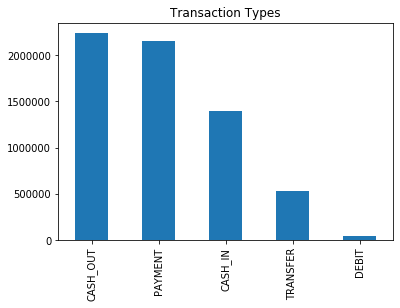

In [17]:
df['type'].value_counts().plot(kind='bar')
plt.title('Transaction Types')
plt.show()

In [18]:
# Transaction is Flagged Fraud if the amount of transferred is more than 200,000

df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [19]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [20]:
# See info on "isFlaggedFraud"
pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [21]:
# Groupby var type
df.groupby('type')['isFraud', 'isFlaggedFraud'].sum()

,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


1. Number of fraudulent with Transfer method = 4097
2. Number of fraudulent with Cash Out method = 4116
3. Type of transaction occur in isFlaggedFraud = Transfer
4. Only 16 data, fraud attempt in transfer with more than 200,000 in single transaction

In [22]:
fraud = df[df['isFraud'] == 1]
nonfraud = df[df['isFraud'] == 0]


In [36]:
# In variables nameOrig and nameDest only need code C (Customer) or M (Merchant)

df['nameOrig'] = df['nameOrig'].str[0]
df['nameDest'] = df['nameDest'].str[0]


pd.concat([df.head(), df.tail()])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.00,160296.36,M,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C,21249.00,19384.72,M,0.00,0.00,0,0
2,1,TRANSFER,181.00,C,181.00,0.00,C,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C,181.00,0.00,C,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C,41554.00,29885.86,M,0.00,0.00,0,0
6362615,743,CASH_OUT,339682.13,C,339682.13,0.00,C,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C,6311409.28,0.00,C,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C,6311409.28,0.00,C,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C,850002.52,0.00,C,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C,850002.52,0.00,C,6510099.11,7360101.63,1,0


## Fraud

In [23]:
fraud.describe()

# `Data Fraud`
# average for step is 368 hours
# median of amount is 441,423

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


In [24]:
fraud.describe(include = 'O')

# Mostly fraud happens by cashing out the fund
# Most Fraud happens `from customer to customer`

,type,nameOrig,nameDest
count,8213,8213,8213
unique,2,8213,8169
top,CASH_OUT,C1256769742,C200064275
freq,4116,1,2


In [25]:
pd.crosstab(index = fraud['type'], columns = fraud['isFraud'], normalize = 'columns')

isFraud,1
type,
CASH_OUT,0.501157
TRANSFER,0.498843


In [26]:
pd.crosstab(index = fraud['step'], columns = fraud['type'], normalize = 'columns')

type,CASH_OUT,TRANSFER
step,,
1,0.002187,0.001709
2,0.000972,0.000976
3,0.000486,0.000488
4,0.001215,0.001220
5,0.000729,0.000732
...,...,...
739,0.001215,0.001220
740,0.000729,0.000732
741,0.002672,0.002685


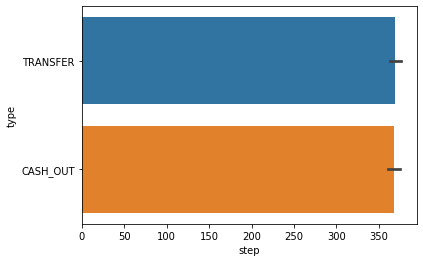

In [27]:
# Step(hour) and Transaction Type in Fraud
sns.barplot(x = fraud['step'], y = fraud['type'], data = fraud)


In [28]:

pd.crosstab(index = fraud['amount'], columns = fraud['type'], normalize = 'columns')


type,CASH_OUT,TRANSFER
amount,,
0.00,0.003887,0.000000
63.80,0.000243,0.000244
119.00,0.000243,0.000244
119.65,0.000243,0.000244
151.00,0.000243,0.000244
...,...,...
9887819.06,0.000243,0.000244
9960382.40,0.000243,0.000244
9977761.05,0.000243,0.000244


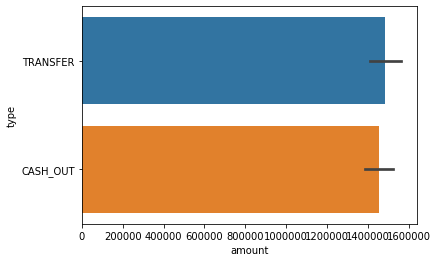

In [29]:
# Amount and Transaction Type in Fraud
sns.barplot(x = fraud['amount'], y = fraud['type'], data = fraud)

# The amount of transactions in Transfer and Cash out almost equal

## Non Fraud

In [30]:
nonfraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0,0.0
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0,0.0
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0,0.0
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0,0.0


In [31]:
nonfraud.describe(include = 'O')

# 

,type,nameOrig,nameDest
count,6354407,6354407,6354407
unique,5,6345122,2719685
top,CASH_OUT,C1530544995,C1286084959
freq,2233384,3,113


In [32]:
pd.crosstab(index = nonfraud['type'], columns = nonfraud['isFraud'], normalize = 'columns')

# Most transaction which consider non fraud is by Cash out, the least is using Debit

isFraud,0
type,
CASH_IN,0.220207
CASH_OUT,0.351470
DEBIT,0.006520
PAYMENT,0.338583
TRANSFER,0.083220


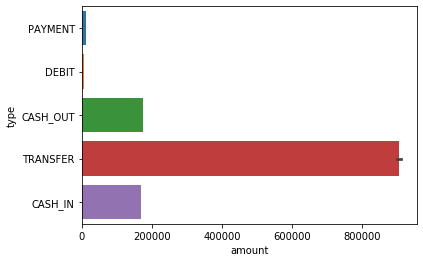

In [33]:
# Amount and Transaction Type in Fraud
sns.barplot(x = nonfraud['amount'], y = nonfraud['type'], data = nonfraud)

# Transfer has the most significant amount

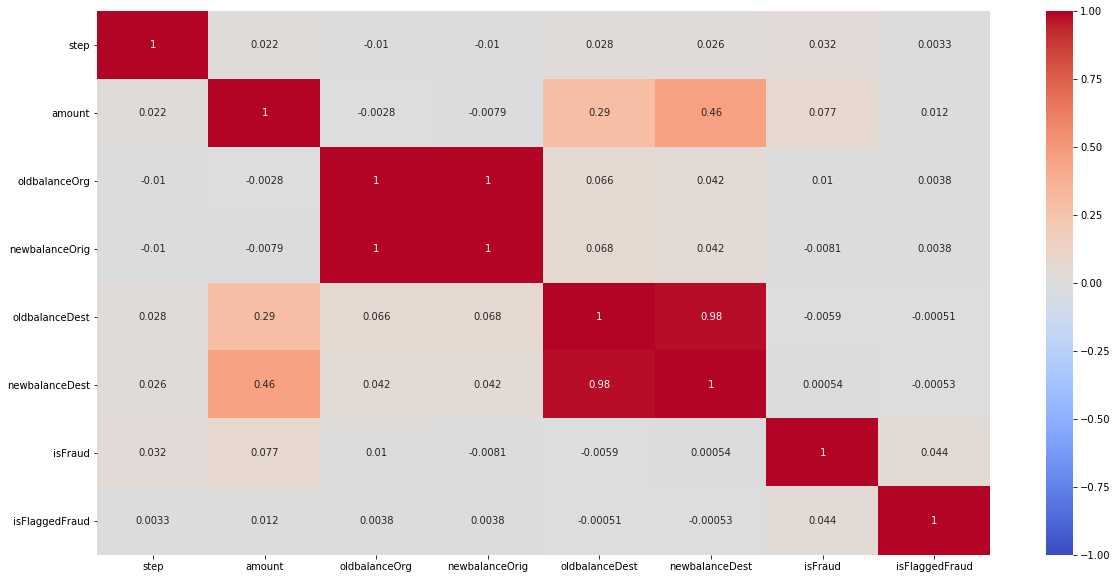

In [34]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [35]:
df.corr()['isFraud'].sort_values(ascending = True)

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

# Conclusion

1. There are five types of transactions in Non Fraud (`Cash In, Cash Out, Debit, Payment, and Transfer`)
2. Fraud occurs only in two of transaction types :
    - `TRANSFER` where money is sent to a customer/fraudster
    - `CASH_OUT` where money is sent to a merchant who pays the customer/fraudster in cash
3. The number of fraudulent Transfers almost equals as Cash Outs
4. Fraud is committed by transferring out funds to another account then cash it out
5. Most transaction which consider non fraud is by Cash out, the least is using Debit
6. Most Fraud happens `from Customer to Customer`

# Recommendation

- Paying attention for customers who make a higher transaction in a single transaction
- Financial Instituion may focus on `Transfer or Cash Out` transactions, since fraud occurs only in those two.